In [118]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import cv2
import os
%matplotlib inline

In [152]:
from sklearn.datasets import load_iris
iris = load_iris()

In [153]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [154]:
from sklearn.model_selection import train_test_split
X = df[["sepal length (cm)","sepal width (cm)"]]
y = df["target"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [155]:
len(X_train) , len(X_test)

(120, 30)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [159]:
knn.score(X_test,y_test)

0.7

In [161]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.56      0.50      0.53        10
           2       0.55      0.60      0.57        10

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



In [162]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  5,  5],
       [ 0,  4,  6]])

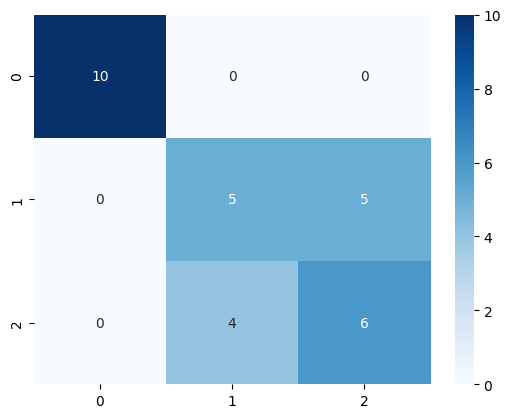

In [163]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()